In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
##from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()



In [20]:
pd.DataFrame(cancer.target).describe()

,0
count,569.000000
mean,0.627417
std,0.483918
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [3]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=10)
tree=DecisionTreeClassifier(random_state=15)
###Decision trees in scikit-learn are implemented in the DecisionTreeRegressor 
##and DecisionTreeClassifier classes. Scikit-learn only implements pre-pruning, not post- pruning.
tree.fit(X_train,y_train)
print("accuracy on training set: %f" % tree.score(X_train, y_train))
print('\n'"accuracy on test set: %f" % tree.score(X_test, y_test))
tree

accuracy on training set: 1.000000

accuracy on test set: 0.944056


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=15,
            splitter='best')

In [5]:
###apply pre-pruning to the tree, which will stop developing the tree before we
### perfectly fit to the training data.
tree01=DecisionTreeClassifier(max_depth=2,random_state=15)
tree01.fit(X_train,y_train)
print('\n'"accuracy on training set 01: %f" % tree01.score(X_train, y_train))
print('\n'"accuracy on test set 01: %f" % tree01.score(X_test, y_test))
 


accuracy on training set 01: 0.967136

accuracy on test set 01: 0.916084


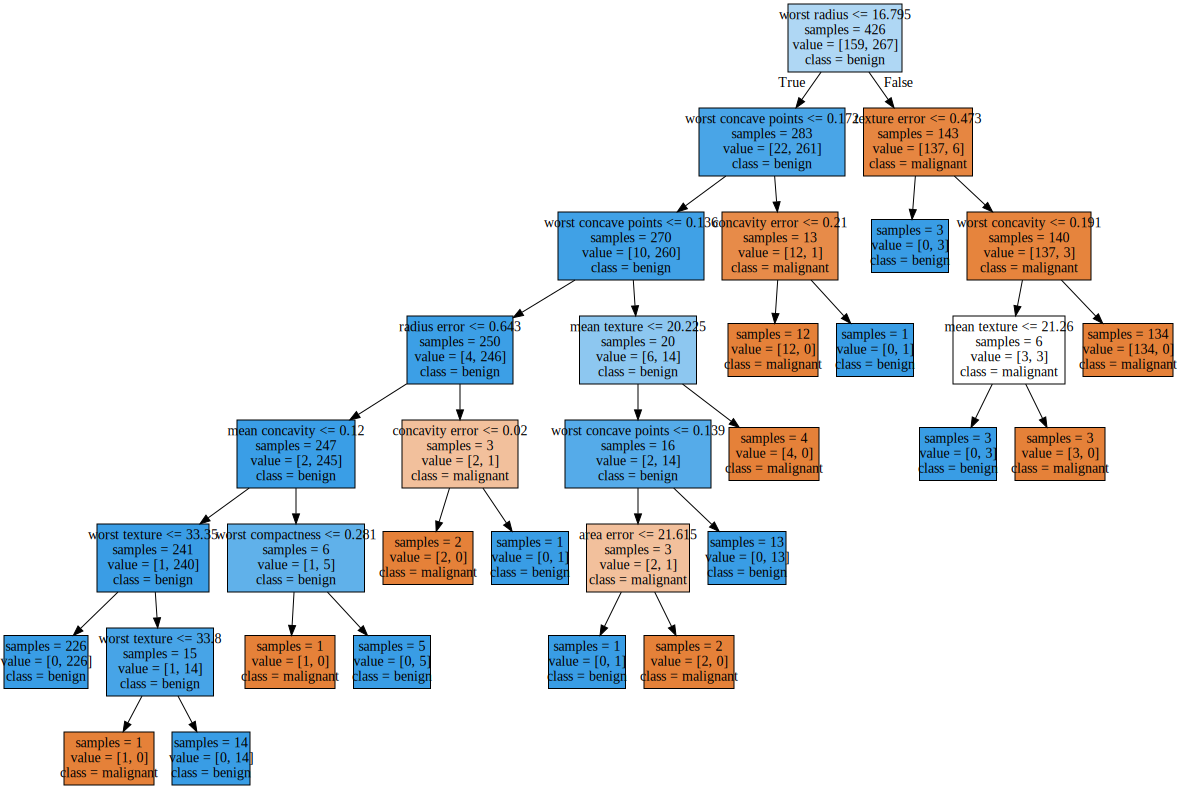

In [6]:
###visualize and analyze the tree model###
###build a file to visualize 
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="mytree.dot",class_names=['malignant',"benign"],
    feature_names=cancer.feature_names,impurity=False,filled=True)
###visualize the .dot file. Need to install graphviz seperately at first 
import graphviz
with open("mytree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [14]:
from sklearn.cross_validation import cross_val_score

In [16]:
scores = cross_val_score(tree01,X_train,y_train,cv=5)

In [17]:
scores

array([ 0.96511628,  0.98837209,  0.88235294,  0.97647059,  0.91666667])

In [18]:
scores.mean()

0.94579571363429094